In [40]:
%load_ext autoreload
%autoreload 2

In [41]:
from hexagon_utilities import *
from colors import *
from plot_functions import *

import matplotlib.pyplot as plt

from scipy.spatial import Voronoi, voronoi_plot_2d


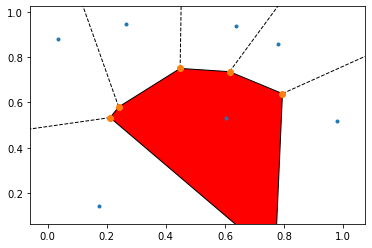

In [34]:
#https://stackoverflow.com/questions/20515554/colorize-voronoi-diagram
# make up data points
points = np.random.rand(7,2)

append_ = False
# add 4 distant dummy points
if append_:
    points = np.append(points, [[999,999], [-999,999], [999,-999], [-999,-999]], axis = 0)

# compute Voronoi tesselation
vor = Voronoi(points)

# plot
#voronoi_plot_2d(vor)
voronoi_plot_2d(vor, show_vertices = True)

# colorize
for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), fc='red')

# fix the range of axes#
#plt.xlim([0,1]), plt.ylim([0,1])

plt.show()

In [22]:
list(zip(points, vor.vertices))

[(array([0.80577266, 0.85890443]), array([-0.0193678 ,  0.65945116])),
 (array([0.52773127, 0.81900189]), array([ 0.73554821, -0.3218    ])),
 (array([0.43496162, 0.95134982]), array([0.62947095, 0.62230874])),
 (array([0.82534415, 0.69566365]), array([0.6239907 , 0.63053781])),
 (array([0.48627402, 0.46985581]), array([0.19135862, 0.68190809])),
 (array([0.80292871, 0.50543419]), array([0.67796967, 0.76078807])),
 (array([0.03425819, 0.12210183]), array([0.64377843, 0.999033  ]))]